## Sentiment Analysis Using Python’s Scikit-Learn

Sentiment analysis is one of the most important parts of Natural Language Processing. It is different than machine learning with numeric data because text data cannot be processed by an algorithm directly. It needs to be transformed into a numeric form. So, text data are vectorized before they get fed into the machine learning model. There are different methods of vectorization. This project is demonstrating sentiment analysis using two types of vectorizers (Count Vectorizer and TF-IDF Vectorizer)and four machine learning models(Logistic Regression, K Nearest Neighbor, Support Vector Machine, and Random Forest).

### 1. Count Vectorizer
        1.1 Logistic Regrssion
        1.2 K Nearest Neighbor
        1.3 Support Vector Classifier
        1.4 Random Forest
        
### 2. TF-IDF Vectorizer
        2.1 Logistic Regrssion
        2.2 K Nearest Neighbor
        2.3 Support Vector Classifier
        2.4 Random Forest
### 3. Conclusion


In [1]:
# General packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

#Visualization libraries
import matplotlib.pyplot as plt 
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go

In [2]:
# NLP packages
import nltk 
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.metrics import classification_report

### Importing Data

In [3]:
# Reading data from .csv file
Reviews = pd.read_csv("Pre-processing_DatafinitiElectronicsProductData")

In [4]:
Reviews.head(3)

,Unnamed: 0,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,...,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight,lowercase_text_reviews,withoutstop_reviews_text,stemmed_reviews_text,lemma_reviews_text
0,0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,this keyboard is very easy to type on but the...,"['keyboard', 'easy', 'type', 'fingerprint', 'r...","['keyboard ', 'easi ', 'type ', 'fingerprint '...","['keyboard ', 'easy ', 'type ', 'fingerprint '..."
1,1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,it s thin and light i can type pretty easily ...,"['thin', 'light', 'type', 'pretty', 'easily']","['thin ', 'light ', 'type ', 'pretti ', 'easil...","['thin ', 'light ', 'type ', 'pretty ', 'easil..."
2,2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,i love the new design the keys are spaced well...,"['love', 'new', 'design', 'keys', 'spaced', 'w...","['love ', 'new ', 'design ', 'key ', 'space ',...","['love ', 'new ', 'design ', 'key ', 'space ',..."


In [5]:
Reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1800 non-null   int64  
 1   id                        1800 non-null   object 
 2   asins                     1800 non-null   object 
 3   brand                     1800 non-null   object 
 4   categories                1800 non-null   object 
 5   colors                    1800 non-null   object 
 6   dateAdded                 1800 non-null   object 
 7   dateUpdated               1800 non-null   object 
 8   dimension                 1800 non-null   object 
 9   ean                       1800 non-null   float64
 10  imageURLs                 1800 non-null   object 
 11  keys                      1800 non-null   object 
 12  manufacturer              1800 non-null   object 
 13  manufacturerNumber        1800 non-null   object 
 14  name    

### Standardization the Ratings

In [6]:
# This function returns sentiment value based on the overall ratings from the user
    
Reviews['Sentiment_rating'] = np.where(Reviews['reviews.rating'] > 3,1,0)

# Removing neutral reviews. 
Reviews = Reviews[Reviews['reviews.rating'] != 3]

# Printing the counts of each class
Reviews['Sentiment_rating'].value_counts()

1    1571
0     115
Name: Sentiment_rating, dtype: int64

In [7]:
Reviews[['lowercase_text_reviews','reviews.rating','Sentiment_rating']].head(5)

,lowercase_text_reviews,reviews.rating,Sentiment_rating
0,this keyboard is very easy to type on but the...,5.0,1
1,it s thin and light i can type pretty easily ...,4.0,1
2,i love the new design the keys are spaced well...,4.0,1
3,attached easily and firmly has a nice feel a...,5.0,1
4,our original keyboard was okay but did not ha...,5.0,1


### Sentiment Analysis
The goal of this project is to train a model that can output if a review is positive or negative.

In [8]:
X = Reviews['lowercase_text_reviews']
y = Reviews['Sentiment_rating']

# 1. Count Vectorizer

Using count vectorizer to vectorize the text data in the review column (training feature for this project) and then use three different classification models from scikit-learn models. After that, to evaluate the model on this dataset find out the accuracy, confusion matrix, true positive rates, and true negative rates. 

### 1.1 Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=24)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
#Vectorizing the text data
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
#Training the model
lr = LogisticRegression()
lr.fit(ctmTr, y_train)
#Accuracy score
lr_score = lr.score(X_test_dtm, y_test)
print("Results for Logistic Regression with CountVectorizer")
print("Accuracy score",lr_score)

#Predicting the labels for test data
y_pred_lr = lr.predict(X_test_dtm)
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print("Confusion matrix",tn, fp, fn, tp)


#True positive and true negative rates
tpr_lr = round(tp/(tp + fn), 4)
tnr_lr = round(tn/(tn+fp), 4)
print("True positive rates: ",tpr_lr)
print("True negative rates: ",tnr_lr)

Results for Logistic Regression with CountVectorizer
Accuracy score 0.930011862396204
Confusion matrix 13 46 13 771
True positive rates:  0.9834
True negative rates:  0.2203


In [10]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.50      0.22      0.31        59
           1       0.94      0.98      0.96       784

    accuracy                           0.93       843
   macro avg       0.72      0.60      0.63       843
weighted avg       0.91      0.93      0.92       843



Result for confusion matrix:  13 46 13 771


Text(23.999999999999993, 0.5, 'Actual')

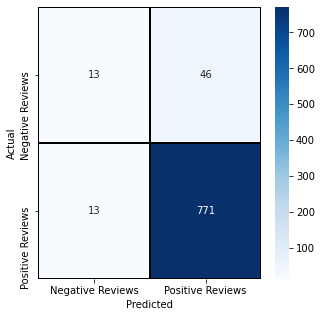

In [11]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_lr,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 1.2 K Nearest Neighbor
KNN clasifier takes less time than Support Vector Machine classifier

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=143)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ctmTr, y_train)
knn_score = knn.score(X_test_dtm, y_test)
print("Results for KNN Classifier with CountVectorizer")
print("Accuracy score",knn_score)

y_pred_knn = knn.predict(X_test_dtm)
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)

tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print("True positive rates: ",tpr_knn)
print("True negative rates: ",tnr_knn)

Results for KNN Classifier with CountVectorizer
Accuracy score 0.933570581257414
Confusion matrix:  0 55 1 787
True positive rates:  0.9987
True negative rates:  0.0


In [13]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        55
           1       0.93      1.00      0.97       788

    accuracy                           0.93       843
   macro avg       0.47      0.50      0.48       843
weighted avg       0.87      0.93      0.90       843



Result for confusion matrix:  0 55 1 787


Text(23.999999999999993, 0.5, 'Actual')

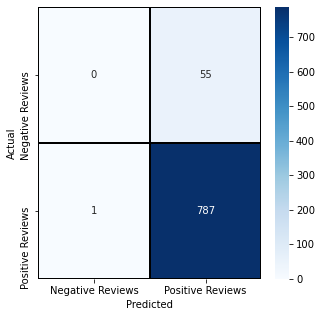

In [14]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_knn,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 1.3 Support Vector Machine

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=123)
#Vectorizing the text data
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn import svm
#Training the model
svcl = svm.SVC()
svcl.fit(ctmTr, y_train)
svcl_score = svcl.score(X_test_dtm, y_test)
print("Results for Support Vector Machine with CountVectorizer")
print("Accuracy score: ",svcl_score)

y_pred_sv = svcl.predict(X_test_dtm)
#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print("True positive rates: ",tpr_sv)
print("True negative rates: ",tnr_sv)

Results for Support Vector Machine with CountVectorizer
Accuracy score:  0.9323843416370107
Confusion matrix:  0 57 0 786
True positive rates:  1.0
True negative rates:  0.0


In [16]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        57
           1       0.93      1.00      0.97       786

    accuracy                           0.93       843
   macro avg       0.47      0.50      0.48       843
weighted avg       0.87      0.93      0.90       843



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Result for confusion matrix:  0 57 0 786


Text(23.999999999999993, 0.5, 'Actual')

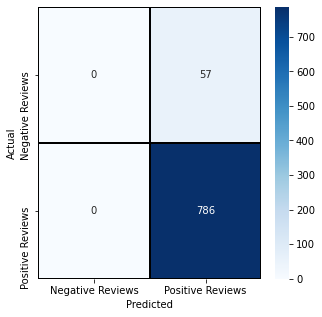

In [17]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_sv,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 1.4 Random Forest with Countvectorizer

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state= None)
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer()
rf_cv = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(bootstrap=True, class_weight=None)
rf.fit(rf_cv, y_train)
rf_score = rf.score(X_test_dtm, y_test)
print("Results for Random Forest Classifier with CountVectorizer")
print("Accuracy score",knn_score)

y_pred_rf = rf.predict(X_test_dtm)
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)

tpr_rf = round(tp/(tp + fn), 4)
tnr_rf = round(tn/(tn+fp), 4)
print("True positive rates: ",tpr_rf)
print("True negative rates: ",tnr_rf)

Results for Random Forest Classifier with CountVectorizer
Accuracy score 0.933570581257414
Confusion matrix:  0 51 1 791
True positive rates:  0.9987
True negative rates:  0.0


In [19]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        51
           1       0.94      1.00      0.97       792

    accuracy                           0.94       843
   macro avg       0.47      0.50      0.48       843
weighted avg       0.88      0.94      0.91       843



Result for confusion matrix:  0 51 1 791


Text(23.999999999999993, 0.5, 'Actual')

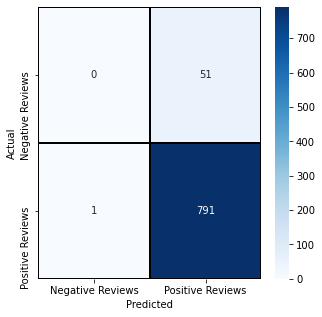

In [20]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_rf,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# 2. TF-IDF Vectorizer
The vectorizer is known to be more popular one because it uses the term frequency of words, and using TF-IDF vectorizer.

### 2.1 Logistic regression with the TF-IDF vectorizer

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=45)
from sklearn.feature_extraction.text import TfidfVectorizer
#tfidf vectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with TF-IDF vectorizer")
print("Accuracy score: ",lr_score)

y_pred_lr = lr.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print("Confusion matrix: ", tn, fp, fn, tp)

tpr_lr_tf_idf = round(tp/(tp + fn), 4)
tnr_lr_tf_idf = round(tn/(tn+fp), 4)
print("True positive rates: ", tpr_lr_tf_idf)
print("True negative rates: ", tnr_lr_tf_idf)

Results for Logistic Regression with TF-IDF vectorizer
Accuracy score:  0.9406880189798339
Confusion matrix:  0 50 0 793
True positive rates:  1.0
True negative rates:  0.0


In [22]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.94      1.00      0.97       793

    accuracy                           0.94       843
   macro avg       0.47      0.50      0.48       843
weighted avg       0.88      0.94      0.91       843



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Result for confusion matrix:  0 50 0 793


Text(23.999999999999993, 0.5, 'Actual')

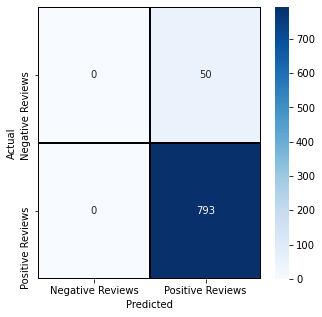

In [23]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_lr,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 2.2 K Nearest Neighbor with the TF-IDF vectorizer

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=300)

vectorizer = TfidfVectorizer()
#vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_vec, y_train)
knn_score = knn.score(X_test_vec, y_test)
print("Results for KNN Classifier with tfidf")
print("Accuracy score: ", knn_score)
y_pred_knn = knn.predict(X_test_vec)
#Confusion matrix
cm_knn_tf_idf = confusion_matrix(y_test, y_pred_knn)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print("True positive rates:", tpr_knn)
print("True negative rates:", tnr_knn)

Results for KNN Classifier with tfidf
Accuracy score:  0.9323843416370107
Confusion matrix:  4 46 11 782
True positive rates: 0.9861
True negative rates: 0.08


In [25]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.27      0.08      0.12        50
           1       0.94      0.99      0.96       793

    accuracy                           0.93       843
   macro avg       0.61      0.53      0.54       843
weighted avg       0.90      0.93      0.91       843



Result for confusion matrix:  4 46 11 782


Text(23.999999999999993, 0.5, 'Actual')

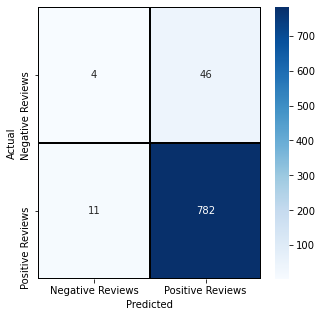

In [26]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_knn_tf_idf = confusion_matrix(y_test, y_pred_knn)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_knn).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_knn_tf_idf,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 2.3 Support Vector Machine with the TF-IDF vectorizer

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=55)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn import svm

svcl = svm.SVC(kernel = 'rbf')

svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print("Accuracy score: ", svcl_score)

y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print("True positive rates:", tpr_sv)
print("True negative rates:", tnr_sv)

Results for Support Vector Machine with tfidf
Accuracy score:  0.9288256227758007
Confusion matrix:  0 60 0 783
True positive rates: 1.0
True negative rates: 0.0


In [28]:
print(classification_report(y_test, y_pred_sv))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        60
           1       0.93      1.00      0.96       783

    accuracy                           0.93       843
   macro avg       0.46      0.50      0.48       843
weighted avg       0.86      0.93      0.89       843



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Result for confusion matrix:  0 60 0 783


Text(23.999999999999993, 0.5, 'Actual')

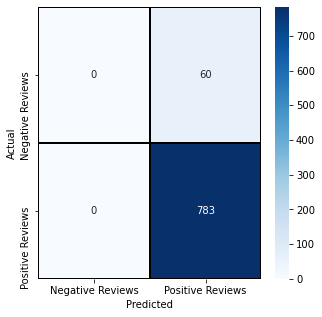

In [29]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
cm_sv_tf_idf = confusion_matrix(y_test, y_pred_sv)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(cm_sv,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

### 2.4 Random Forest with the TF-IDF vectorizer

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                        test_size = 0.5, random_state=100)
vectorizer = TfidfVectorizer()
X_train_rf = vectorizer.fit_transform(X_train)
X_test_rf = vectorizer.transform(X_test)

from sklearn.ensemble import RandomForestClassifier

rf_tf_idf = RandomForestClassifier()
rf_tf_idf.fit(X_test_rf,y_train)


rf_tf_idf_score = rf_tf_idf.score(X_test_rf, y_test)
print("Results for Support Vector Machine with tfidf")
print("Accuracy score: ", rf_tf_idf_score)

y_pred_rf_tf_idf = rf_tf_idf.predict(X_test_rf)
#Confusion matrix
from sklearn.metrics import confusion_matrix
rf_tf_idf = confusion_matrix(y_test, y_pred_rf_tf_idf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_tf_idf).ravel()
print("Confusion matrix: ",tn, fp, fn, tp)
tpr_rf_tf_idf = round(tp/(tp + fn), 4)
tnr_rf_tf_idf = round(tn/(tn+fp), 4)

print("True positive rates:", tpr_rf_tf_idf)
print("True negative rates:", tnr_rf_tf_idf)

Results for Support Vector Machine with tfidf
Accuracy score:  0.8730723606168446
Confusion matrix:  4 56 51 732
True positive rates: 0.9349
True negative rates: 0.0667


In [31]:
print(classification_report(y_test, y_pred_rf_tf_idf))

              precision    recall  f1-score   support

           0       0.07      0.07      0.07        60
           1       0.93      0.93      0.93       783

    accuracy                           0.87       843
   macro avg       0.50      0.50      0.50       843
weighted avg       0.87      0.87      0.87       843



Result for confusion matrix:  4 56 51 732


Text(23.999999999999993, 0.5, 'Actual')

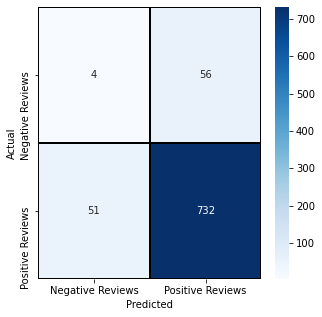

In [32]:
from sklearn.metrics import confusion_matrix
#Confusion matrix
rf_tf_idf = confusion_matrix(y_test, y_pred_rf_tf_idf)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_rf_tf_idf).ravel()
print("Result for confusion matrix: ",tn, fp, fn, tp)

plt.figure(figsize = (5,5))
sns.heatmap(rf_tf_idf,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = ['Negative Reviews','Positive Reviews'], 
            yticklabels = ['Negative Reviews','Positive Reviews'])
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Conclusion

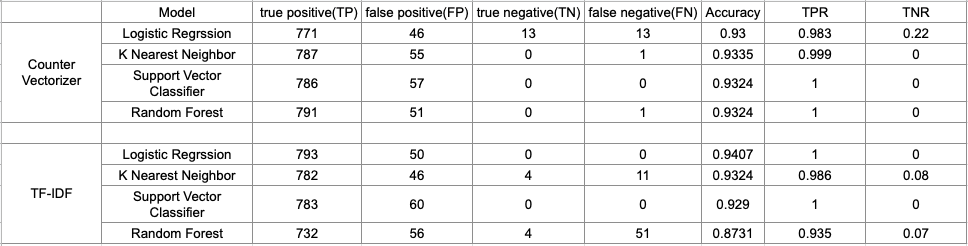

#### Some findings:

1. Logistic regression was the best out of all three classifiers used for this project considering overall accuracy, true positive rate, and true negative rate.


2. The Support Vector classifier does not seem to be suitable for this project. Though true positive rates look very good, true negative rates look really poor.


3. Count Vectorizer give number of frequency with respect to index of vocabulary where as tf-idf consider overall documents of weight of words, but from my analysis it has very little difference of performance.